In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Astronomy tools
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck18

In [2]:
df = pd.read_csv('../data/galaxies_dr18.csv')
print("First 5 rows of data:")
df.head()

First 5 rows of data:


,specObjID,ra,dec,z,class,zWarning
0,1969340280633059328,161.86432,13.889750,0.010000,GALAXY,0
1,1900596066647042048,255.50510,23.163478,0.010000,GALAXY,0
2,8334101989970696192,175.32263,47.696914,0.010001,GALAXY,0
3,408710220768897024,234.06450,-0.349405,0.010001,GALAXY,0
4,2220363460007454720,173.03515,40.215365,0.010006,GALAXY,0


In [3]:
list(df.columns)

['specObjID', 'ra', 'dec', 'z', 'class', 'zWarning']

In [4]:
# Check for missing/null values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Missing values in each column:
specObjID    0
ra           0
dec          0
z            0
class        0
zWarning     0
dtype: int64

Number of duplicate rows: 0


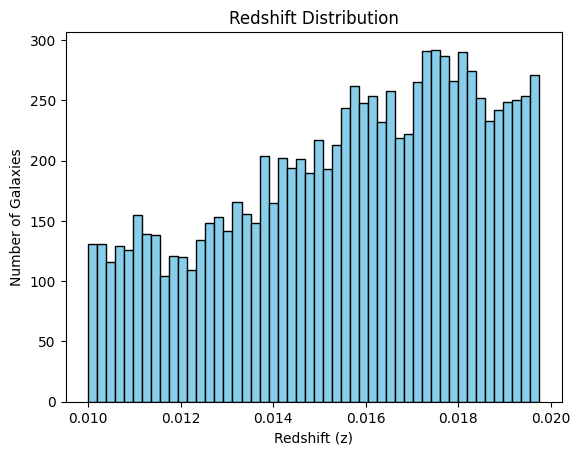

In [5]:
plt.hist(df['z'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Galaxies')
plt.title('Redshift Distribution')
plt.show()

In [6]:
df = df.drop(columns=['zWarning'])
df.head()

,specObjID,ra,dec,z,class
0,1969340280633059328,161.86432,13.889750,0.010000,GALAXY
1,1900596066647042048,255.50510,23.163478,0.010000,GALAXY
2,8334101989970696192,175.32263,47.696914,0.010001,GALAXY
3,408710220768897024,234.06450,-0.349405,0.010001,GALAXY
4,2220363460007454720,173.03515,40.215365,0.010006,GALAXY


In [7]:
coords = SkyCoord(ra=df['ra'].values * u.degree, dec=df['dec'].values * u.degree, frame='icrs')
distances = Planck18.comoving_distance(df['z'].values)
print(distances)

[44.20558479 44.20642271 44.20752525 ... 87.08218745 87.08231915
 87.08403117] Mpc


In [8]:
# Convert RA, Dec from SkyCoord to radians
ra_rad = coords.ra.radian
dec_rad = coords.dec.radian

# Extract distances in Mpc (as float)
r = distances.value

# Calculate Cartesian coordinates
x = r * np.cos(dec_rad) * np.cos(ra_rad)
y = r * np.cos(dec_rad) * np.sin(ra_rad)
z = r * np.sin(dec_rad)

# Add Cartesian coords to dataframe for easy use
df['x'] = x
df['y'] = y
df['z_cart'] = z  # renamed so it doesn't conflict with redshift column 'z'

print(df[['x', 'y', 'z_cart']].head())

           x          y     z_cart
0 -40.781161  13.357453  10.611744
1 -10.172636 -39.349115  17.388859
2 -29.654888   2.426284  32.695658
3 -25.945376 -35.795417  -0.269604
4 -33.526855   4.095704  28.558546


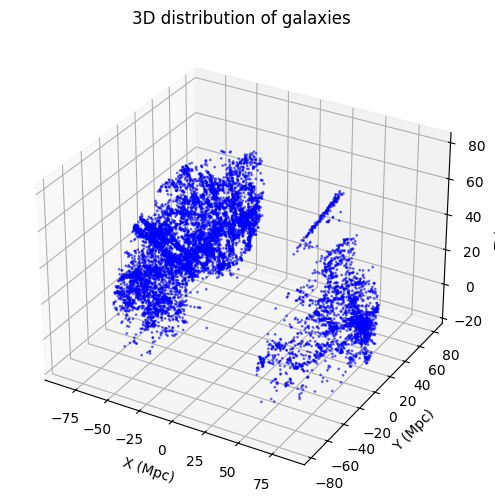

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x'], df['y'], df['z_cart'], s=1, alpha=0.5, color='blue')
ax.set_xlabel('X (Mpc)')
ax.set_ylabel('Y (Mpc)')
ax.set_zlabel('Z (Mpc)')
ax.set_title('3D distribution of galaxies')

plt.show()

In [11]:
df.to_csv('../data/galaxies_cartesian.csv', index=False)